In [138]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator

In [140]:
#EDA

len(os.listdir("datasets/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

39

In [141]:
train_data_gen = ImageDataGenerator(rescale= 1./255,zoom_range= 0.6, shear_range = 0.3, horizontal_flip = True, fill_mode='nearest')

validation_data_gen = ImageDataGenerator(rescale= 1./255)

In [142]:
training_set = train_data_gen.flow_from_directory(directory = "datasets/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", target_size = (256, 256), batch_size = 32)

validation_set = validation_data_gen.flow_from_directory(directory = "datasets/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid", target_size = (256, 256,), batch_size = 32)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [143]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(38, activation='softmax')
])

In [144]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [145]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping

# es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1)

# mc = ModelCheckpoint(filepath = "best_model.h5", monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1, save_best_only = True)

# cb = [es, mc]

In [146]:
history = model.fit(training_set, epochs = 50, steps_per_epoch = 16, validation_data = validation_set, validation_steps = 16,)

Epoch 1/50


2023-02-26 07:50:08.801917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - ETA: 0s - loss: 3.9846 - accuracy: 0.0293

2023-02-26 07:50:16.701167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 10s 599ms/step - loss: 3.9846 - accuracy: 0.0293 - val_loss: 3.6375 - val_accuracy: 0.0312
Epoch 2/50
16/16 [==============================] - 6s 372ms/step - loss: 3.6337 - accuracy: 0.0273 - val_loss: 3.6216 - val_accuracy: 0.0254
Epoch 3/50
16/16 [==============================] - 6s 376ms/step - loss: 3.6261 - accuracy: 0.0449 - val_loss: 3.6120 - val_accuracy: 0.0254
Epoch 4/50
16/16 [==============================] - 6s 375ms/step - loss: 3.5726 - accuracy: 0.0430 - val_loss: 3.4471 - val_accuracy: 0.0840
Epoch 5/50
16/16 [==============================] - 6s 365ms/step - loss: 3.5328 - accuracy: 0.0469 - val_loss: 3.4157 - val_accuracy: 0.0605
Epoch 6/50
16/16 [==============================] - 6s 375ms/step - loss: 3.4933 - accuracy: 0.0762 - val_loss: 3.4395 - val_accuracy: 0.0703
Epoch 7/50
16/16 [==============================] - 6s 379ms/step - loss: 3.5321 - accuracy: 0.0547 - val_loss: 3.3592 - val_accuracy: 0.0801
Epoch 8/50
16/16

In [147]:
model.save('new_best_model.h5')

In [148]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

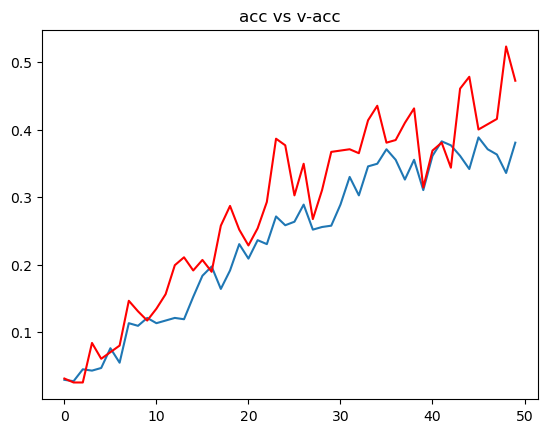

In [158]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

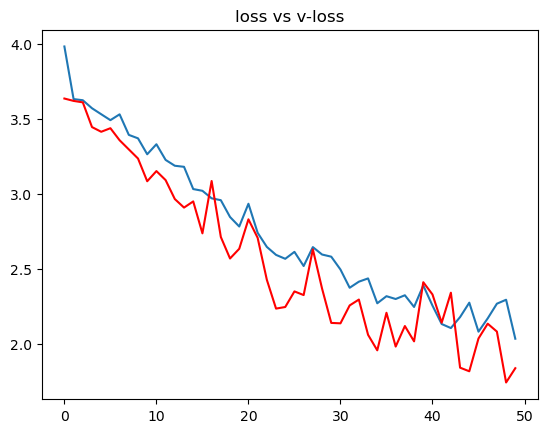

In [167]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c = "red")
plt.title("loss vs v-loss")
plt.show()

In [160]:
# from keras.models import load_model

# model = load_model("best_model.h5")

In [161]:
# accuracy = model.evaluate(validation_set)[1]

# print(f"The accuracy of the model is = {accuracy * 100} %")

In [162]:
ref = dict(zip(list(training_set.class_indices.values()), list(training_set.class_indices.keys())))

In [166]:
print(ref)

{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

In [163]:
from tensorflow.keras.utils import img_to_array, load_img

In [164]:
def prediction(path):
  img = load_img(path, target_size=(256,256))
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img / 255.0
  pred = np.argmax(model.predict(img))
  # print(f"the image belongs to {ref[pred]}")
  print(ref[pred])

In [165]:
path = "datasets/test/test/PotatoEarlyBlight1.JPG"
prediction(path)

1/1 [==============================] - 0s 115ms/step
Potato___Early_blight
